[View in Colaboratory](https://colab.research.google.com/github/omaresguerra/TensorFlow-Basic-Classification/blob/master/My_First_TensorFlow_Program.ipynb)

In [9]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib as plt

print(tf.__version__)


1.9.0


In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-sshirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', \
              'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [12]:
train_images.shape

(60000, 28, 28)

In [13]:
len(train_labels)

60000

In [14]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [15]:
test_images.shape

(10000, 28, 28)

In [17]:
len(test_labels)

10000

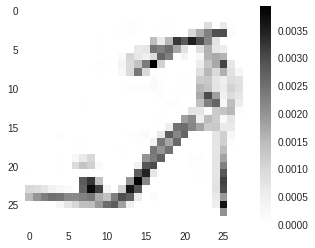

In [55]:
plt.figure()
plt.imshow(train_images[8])
plt.colorbar()
plt.gca().grid(False)

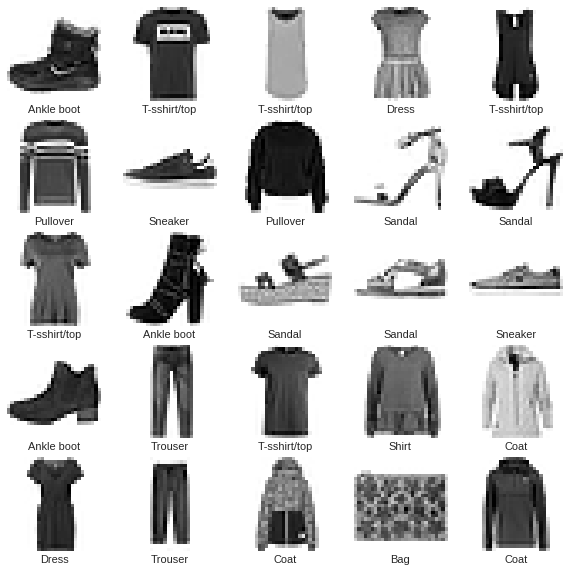

In [50]:
train_images = train_images / 255.0
test_images = test_images / 255.0

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
  

In [32]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 83us/step - loss: 2.3020 - acc: 0.1043
Epoch 2/5
60000/60000 [==============================] - 4s 69us/step - loss: 2.2939 - acc: 0.1534
Epoch 3/5
60000/60000 [==============================] - 4s 69us/step - loss: 2.2687 - acc: 0.2088
Epoch 4/5
60000/60000 [==============================] - 4s 69us/step - loss: 2.2254 - acc: 0.2403
Epoch 5/5
26464/60000 [============>.................] - ETA: 2s - loss: 2.1870 - acc: 0.2823

60000/60000 [==============================] - 4s 70us/step - loss: 2.1703 - acc: 0.2844


In [33]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 33us/step
Test accuracy: 0.3362


In [34]:
predictions = model.predict(test_images)

predictions[0]


array([0.07558811, 0.08667938, 0.07984961, 0.08328677, 0.07582881,
       0.13715138, 0.08083466, 0.13667622, 0.10942221, 0.1346829 ],
      dtype=float32)

In [35]:
np.argmax(predictions[0])

5

In [36]:
test_labels[0]

9

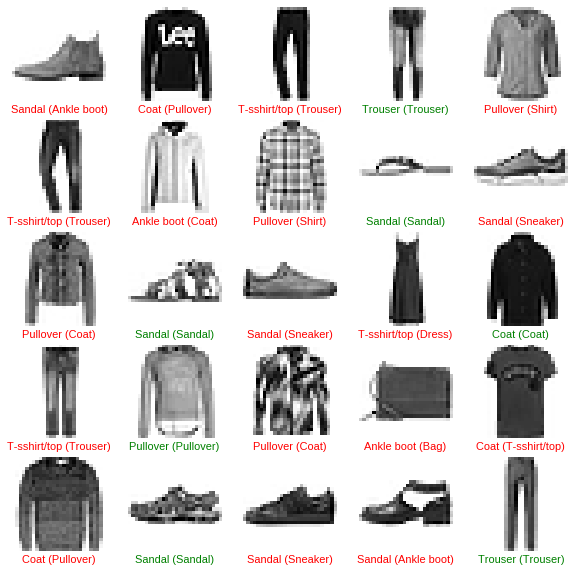

In [39]:
# Plot the firdt 25 test images, their predicted label, and true label
# Color correct predictions in green, incorrect predictions in red

plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions[i])
  true_label = test_labels[i]
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'
  plt.xlabel("{} ({})".format(class_names[predicted_label],
                             class_names[true_label]),
                             color = color)

In [40]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [42]:
# Add the image to a batch where it's the only member
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [43]:
predictions = model.predict(img)

print(predictions)


[[0.07558811 0.08667938 0.07984961 0.08328677 0.07582881 0.13715138
  0.08083466 0.13667622 0.10942221 0.1346829 ]]


In [45]:
prediction = predictions[0]
np.argmax(prediction)

5